**Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
Aluno: _Gabriel Martinez Machado_     
Cartão UFRGS: _00332275_**     


# TRABALHO 02 - Introdução à teoria de vibrações (PEC00025)


### SUMÁRIO

[1.   Introdução](#section_1)  
[2.   Análises](#section_2)  
[3.   Considerações finais](#section_3)    

---


In [40]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
from   MRPy import MRPy


## INTRODUÇÃO<a name="section_1"></a>  

Previamente, o Trabalho 01 apresentado à disciplina de Introdução à teoria de vibrações realizou o registro da resposta de um sistema em vibração livre com um grau de liberdade a um impulso do tipo unitário, representado experimentalmente por um _smartphone_ acoplado à extremidade de uma régua metálica. O registro obtido com a ajuda do aplicativo iNVH BOSCH, na sua faixa de interesse para esta análise, pode ser observado a seguir.

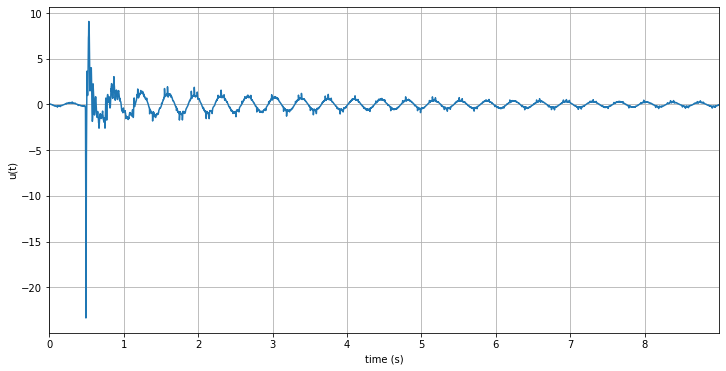

In [41]:
# Importing data from previous work
%matplotlib inline

data = MRPy.from_file('resources/data/t1_data', form='invh').zero_mean()
free = data.extract((9.7, 18.7), by='time')
free = MRPy(free[2], free.fs)
t    = free.t_axis()
Td   = free.Td

plt.figure(4, figsize=(12, 6), clear=True)
plt.plot(t, free[0])

plt.xlim( 0, Td);  
plt.xlabel('time (s)') 
plt.ylabel('u(t)') 

plt.grid(True);

Assim sendo, o presente exercício tem como objetivo utilizar, para fins didáticos, o registro obtido anteriormente como sendo equivalente à excitação de um novo sistema, também de grau de liberdade unitário. Serão efetuados: o periodograma da excitação, o cálculo da resposta do sistema estrutural à excitação apresentada (sob as prerrogativas de que a razão de amortecimento estrutural $\zeta=1\%$ e a frequência fundamental do sistema será a mesma da vibração aplicada) e o espectro de potência para o sistema em questão.

## ANÁLISES <a name="section_2"></a> 


O primeiro passo consiste da estimativa da densidade do espectro de potência do registro, $S_F(\omega)$. Um processo simples que permite a estimativa de tal parâmetro de forma rápida é o denominado periodograma, uma ferramenta de análise capaz de indicar processos cíclicos dentro de uma série temporal através de séries de transformadas de Fourier. A seguir apresenta-se o periodograma da excitação, calculado com a ajuda da função ``periodogram`` do módulo MRPy.

Frequency at spectrum peak:  2.78Hz


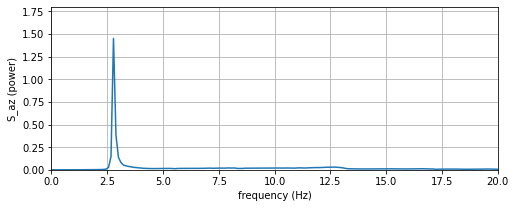

In [42]:
# Calls method for periodogram calculation and visualize

Saz, fs = free.periodogram()
f       = free.f_axis()

plt.figure(5, figsize=(8, 3), clear=True)
plt.plot(f, Saz[0])

plt.xlim(0, 20);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  1.8);   plt.ylabel('S_az (power)') 

plt.grid(True) 

# Search for frequency associated to peak of spectrum

kf = Saz[0].argmax()
print('Frequency at spectrum peak: {0:5.2f}Hz'.format(f[kf]))

Assim sendo, observa-se um pico acentuado do espectro na frequência de 2,78Hz. Esta frequência está de acordo com a frequência natural do sistema em vibração livre observada no Trabalho 01, onde, a partir do ajuste de curvas pelo método dos mínimos quadrados, obteve-se $f=2,80~Hz$.  
O processo seguinte passa pela solução da equação de equilíbrio dinâmico apresentada abaixo, dada no domínio da frequência, a partir da consideração do modelo reológico de Kelvin-Voigt:

$$ -\omega^2 U(\omega) + \frac{k}{m} \; \left( 1 - i\frac{c\omega}{k} \right) U(\omega) = F(\omega) $$

Esta equação, através de um processo de manipulação algébrica, toma a forma de:

$$ U(\omega) = H(\omega) F(\omega) $$

onde:

$$ H(\omega) = \frac{1}{\omega_{\rm n}^2} \; \left[ \frac{1}{(1 - \beta^2) - i(2\zeta\beta)} \right]$$

caracteriza-se pela admitância do sistema mecânico, sendo $\beta = \omega / \omega_{\rm n}$ a frequência admensionalizada.  
A função ``sdof_Fourier()`` implementada no módulo MRPy é capaz de entregar a solução dessa equação no domínio da frequência, a partir da consideração de periodicidade do sinal obtido. Para tal, será considerada uma excitação por unidade de massa equivalente à aceleração obtida até então. A frequência natural de vibração do sistema foi tomada de $f_n=2,78~Hz$, assim como observado no periodograma da excitação. Além disso, a razão de amortecimento foi estabelecida de $\zeta=0,01$.  
De tal forma, permite-se representar graficamente a excitação e resposta do sistema estrutural em função do tempo e o estimador de densidade espectral (espectro de potência) da estrutura, disposto em escala semi-logarítmica.

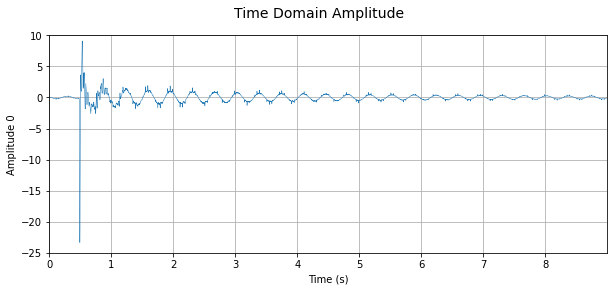

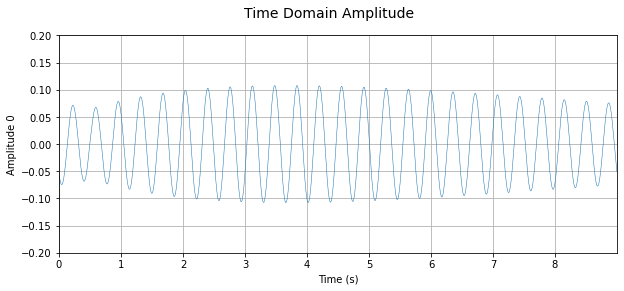

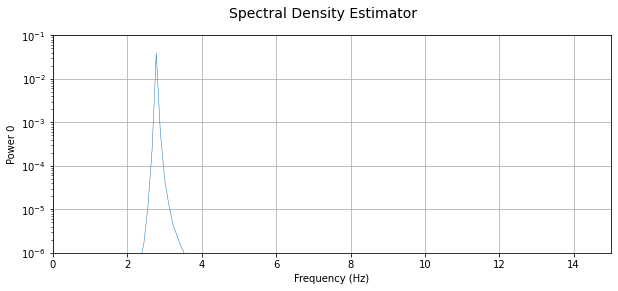

In [46]:
fn   = f[kf]                              # system natural frequency associated with the excitation freq.
zeta = 0.01                               # system damping ratio (nondim)
F    = free                               # excitation = sdof vibration data

u       =  F.sdof_Fourier(fn=fn, zeta=zeta)  # frequency domain solution
sU, fsU = u.periodogram()                    # spectral density estimator
fU      = u.f_axis()

f0 =  F.plot_time(0, figsize=(10,4), axis_t=(0, Td, -25, 10))
f1 =  u.plot_time(1, figsize=(10,4), axis_t=(0, Td, -0.2, 0.2  ))

f2=plt.figure(2, figsize=(10,4), clear=True)
plt.semilogy(fU, sU[0], lw=0.5)
plt.axis([0, 15, 1e-06, 1e-01])
plt.suptitle('Spectral Density Estimator', fontsize=14)
plt.ylabel('Power 0')
plt.xlabel('Frequency (Hz)')
plt.grid(True)


De tal sorte que:

In [44]:
sU1 = np.std(u)                    # standard deviation of u(t)
sU2=np.trapz(sU[0], dx=1/Td)       # area under periodogram curve

print('Variancia do deslocamento u(t): {0:1.8f}'.format(sU1*sU1))
print('Área sobre a curva estimativa de densidade espectral: {0:1.8f}'.format(sU2))

Variancia do deslocamento u(t): 0.00444060
Área sobre a curva estimativa de densidade espectral: 0.00444060


## CONSIDERAÇÕES FINAIS <a name="section_3"></a> 

Como pode-se observar, a resposta apresentada através do espectro de potência do sistema estrutural indica um pico no gráfico relacionado à região de frequências próximas a 2,78 Hz, frequência fundamental de ambos sistema e excitação, que encontram-se na condição de ressonância. Não puderam ser observadas ocorrências de distorções harmônicas em outras faixas de frequência, visto a inexistência de demais picos no gráfico semi-logarítimico de estimativa da densidade espectral. Isto indica, para este caso, a tendência a um comportamento aproximadamente cíclico (senoidal), como visto no gráfico das amplitudes da resposta u(t).